# Preprocessing and EDA

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)

import matplotlib
from scipy.stats import shapiro

## Settings

In [2]:
RAW_DATA_DIR = "./../data/raw"
INTERIM_DATA_DIR = "./../data/interim"
PROCESSED_DATA_DIR = "./../data/processed"
VERSION ="v1.0"
params = {'axes.titlesize':'32',
          'xtick.labelsize':'24',
          'ytick.labelsize':'24'}
matplotlib.rcParams.update(params)

## Load Raw Training Data

In [3]:
raw_df = pd.read_csv(f'{RAW_DATA_DIR}/cs-training.csv')

In [4]:
raw_df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
raw_df.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [6]:
raw_df.shape

(150000, 12)

## Preprocessing and Cleaning

In [7]:
raw_df = raw_df.drop('Unnamed: 0', axis=1)

In [8]:
raw_df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [9]:
raw_df.isnull().values.any()

True

In [10]:
raw_df.isna().any()

SeriousDlqin2yrs                        False
RevolvingUtilizationOfUnsecuredLines    False
age                                     False
NumberOfTime30-59DaysPastDueNotWorse    False
DebtRatio                               False
MonthlyIncome                            True
NumberOfOpenCreditLinesAndLoans         False
NumberOfTimes90DaysLate                 False
NumberRealEstateLoansOrLines            False
NumberOfTime60-89DaysPastDueNotWorse    False
NumberOfDependents                       True
dtype: bool

## NaN values filling

<AxesSubplot:>

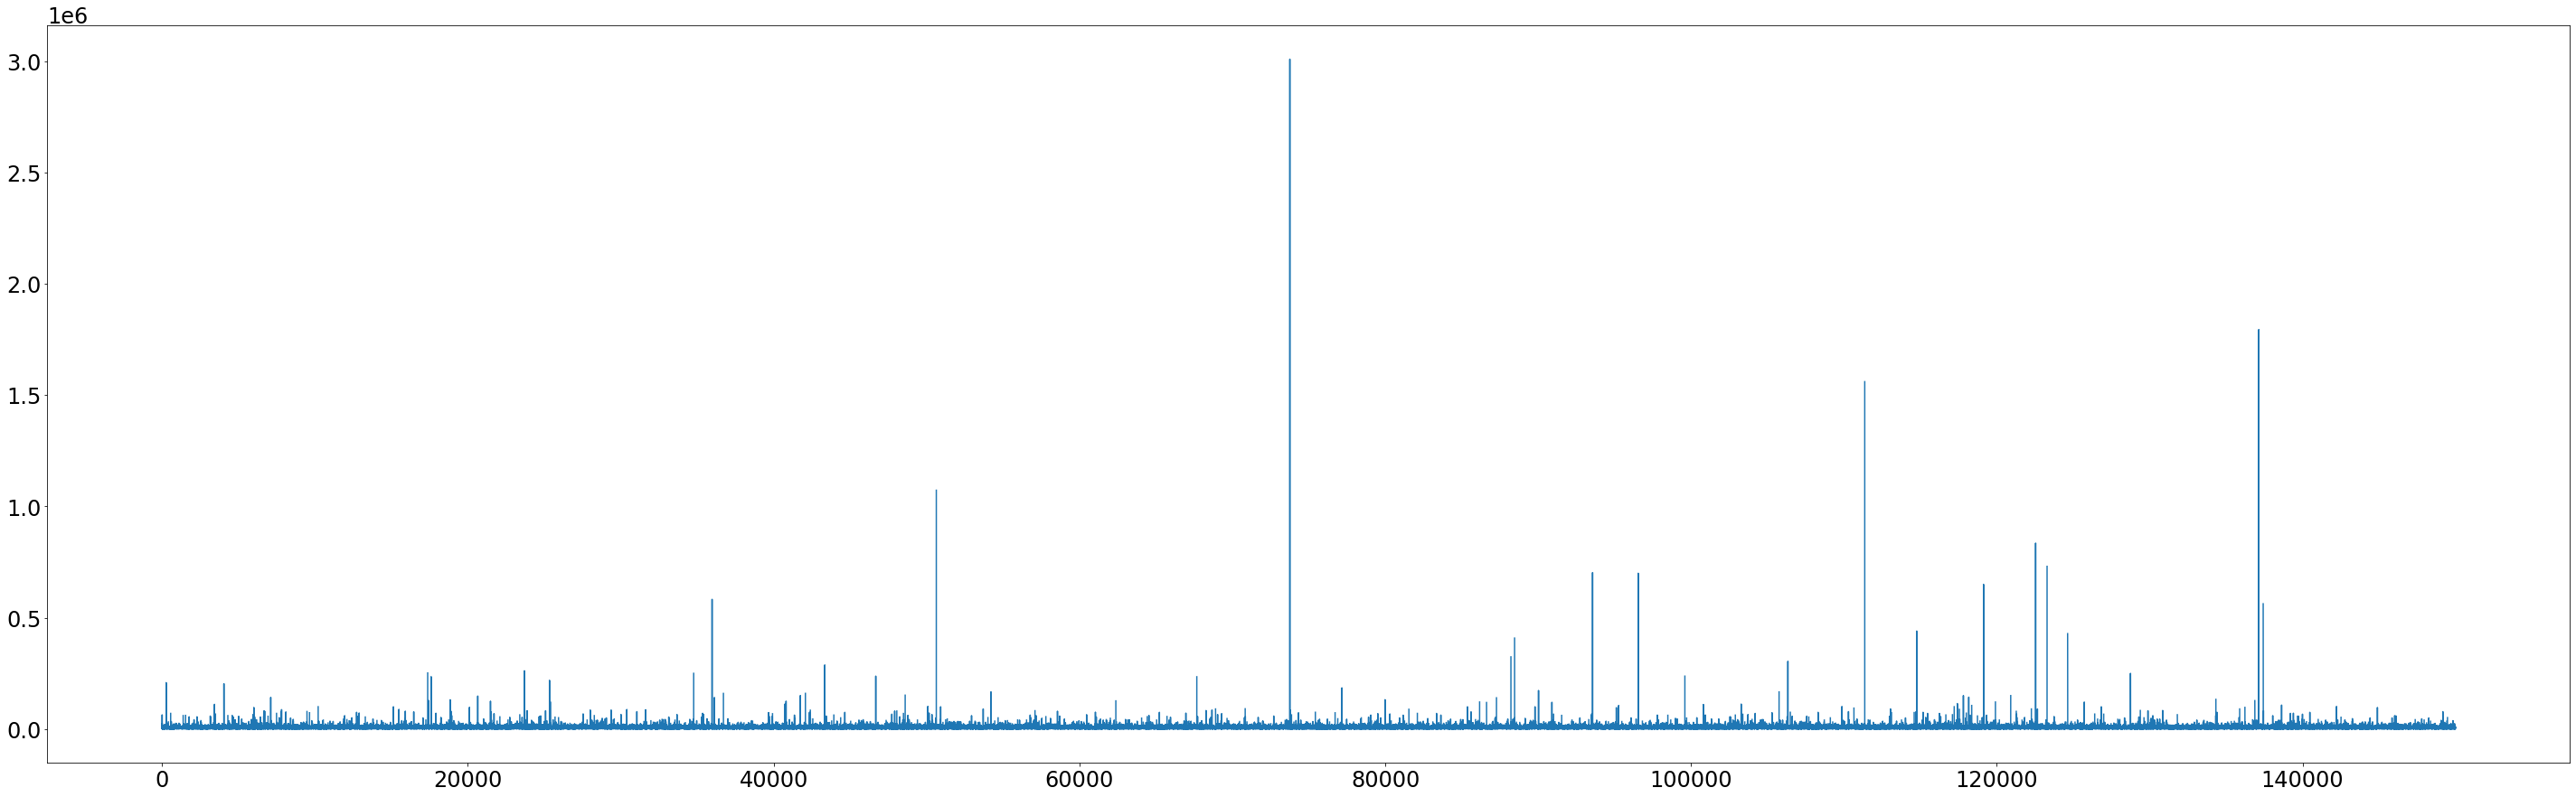

In [11]:
raw_df['MonthlyIncome'].plot(figsize=(50,15))

In [12]:
raw_df['MonthlyIncome'].describe()

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

In [13]:
raw_df[(raw_df['MonthlyIncome'] == np.NaN) | (raw_df['MonthlyIncome'] == 0)].shape

(1634, 11)

In [14]:
raw_df[(raw_df['MonthlyIncome'] == np.NaN) | (raw_df['MonthlyIncome'] == 0)].head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
14,0,0.019657,76,0,477.0,0.0,6,0,1,0,0.0
50,0,0.818978,73,0,3095.0,0.0,9,0,1,1,0.0
73,0,0.059669,31,0,3162.0,0.0,11,0,2,0,1.0
90,0,0.039388,51,0,15466.0,0.0,7,0,0,0,0.0
298,0,0.085152,25,0,1005.0,0.0,5,0,0,0,0.0


In [15]:
no_or_invalid_monthly_income = raw_df[(raw_df['MonthlyIncome'] == np.NaN) | (raw_df['MonthlyIncome'] == 0)]['DebtRatio']
no_or_invalid_monthly_income.describe()

count     1634.000000
mean      1573.567319
std       2818.015889
min          0.000000
25%         96.000000
50%        930.000000
75%       2185.250000
max      60212.000000
Name: DebtRatio, dtype: float64

In [16]:
mask = (raw_df['MonthlyIncome'].notna()) | (raw_df['MonthlyIncome'] > 10)
print(raw_df[mask]['MonthlyIncome'].describe())
print(raw_df[mask]['MonthlyIncome'].count())

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64
120269


In [17]:
cleaned_raw_df = raw_df[mask]

In [18]:
cleaned_raw_df.shape

(120269, 11)

In [19]:
cleaned_raw_df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [20]:
cleaned_raw_df.isna().any()

SeriousDlqin2yrs                        False
RevolvingUtilizationOfUnsecuredLines    False
age                                     False
NumberOfTime30-59DaysPastDueNotWorse    False
DebtRatio                               False
MonthlyIncome                           False
NumberOfOpenCreditLinesAndLoans         False
NumberOfTimes90DaysLate                 False
NumberRealEstateLoansOrLines            False
NumberOfTime60-89DaysPastDueNotWorse    False
NumberOfDependents                      False
dtype: bool

In [21]:
cleaned_raw_df.dtypes

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

## EDA

In [22]:
cleaned_raw_df['SeriousDlqin2yrs'].unique()

array([1, 0])

In [23]:
cleaned_raw_df['SeriousDlqin2yrs'].value_counts()

0    111912
1      8357
Name: SeriousDlqin2yrs, dtype: int64

<AxesSubplot:>

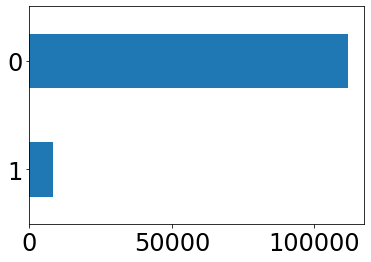

In [24]:
cleaned_raw_df['SeriousDlqin2yrs'].value_counts().sort_values().plot(kind = 'barh')

In [25]:
cleaned_raw_df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,120269.000000,120269.000000,120269.000000,120269.000000,120269.000000,1.202690e+05,120269.000000,120269.000000,120269.000000,120269.000000,120269.000000
mean,0.069486,5.899873,51.289792,0.381769,26.598777,6.670221e+03,8.758475,0.211925,1.054519,0.187829,0.851832
std,0.254280,257.040685,14.426684,3.499234,424.446457,1.438467e+04,5.172835,3.465276,1.149273,3.447901,1.148391
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.035084,40.000000,0.000000,0.143388,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.177282,51.000000,0.000000,0.296023,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.579428,61.000000,0.000000,0.482559,8.249000e+03,11.000000,0.000000,2.000000,0.000000,2.000000
max,1.000000,50708.000000,103.000000,98.000000,61106.500000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


### Correlation

In [26]:
cleaned_raw_df.corr()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,1.000000,-0.002386,-0.102685,0.123159,-0.003291,-0.019746,-0.027445,0.111149,-0.003005,0.093836,0.046704
RevolvingUtilizationOfUnsecuredLines,-0.002386,1.000000,-0.005476,-0.001194,-0.000243,0.007124,-0.010880,-0.000931,0.005895,-0.000955,0.002347
age,-0.102685,-0.005476,1.000000,-0.049177,-0.001260,0.037717,0.187112,-0.047889,0.065110,-0.043501,-0.206397
NumberOfTime30-59DaysPastDueNotWorse,0.123159,-0.001194,-0.049177,1.000000,-0.001981,-0.010217,-0.043868,0.975259,-0.024036,0.980131,0.003538
DebtRatio,-0.003291,-0.000243,-0.001260,-0.001981,1.000000,-0.028712,0.008685,-0.002703,0.019574,-0.001801,0.009803
MonthlyIncome,-0.019746,0.007124,0.037717,-0.010217,-0.028712,1.000000,0.091455,-0.012743,0.124959,-0.011116,0.062647
NumberOfOpenCreditLinesAndLoans,-0.027445,-0.010880,0.187112,-0.043868,0.008685,0.091455,1.000000,-0.072249,0.426536,-0.061505,0.038342
NumberOfTimes90DaysLate,0.111149,-0.000931,-0.047889,0.975259,-0.002703,-0.012743,-0.072249,1.000000,-0.040573,0.989277,-0.003779
NumberRealEstateLoansOrLines,-0.003005,0.005895,0.065110,-0.024036,0.019574,0.124959,0.426536,-0.040573,1.000000,-0.034118,0.118997
NumberOfTime60-89DaysPastDueNotWorse,0.093836,-0.000955,-0.043501,0.980131,-0.001801,-0.011116,-0.061505,0.989277,-0.034118,1.000000,-0.005092


In [27]:
cleaned_raw_df.corr()['SeriousDlqin2yrs']

SeriousDlqin2yrs                        1.000000
RevolvingUtilizationOfUnsecuredLines   -0.002386
age                                    -0.102685
NumberOfTime30-59DaysPastDueNotWorse    0.123159
DebtRatio                              -0.003291
MonthlyIncome                          -0.019746
NumberOfOpenCreditLinesAndLoans        -0.027445
NumberOfTimes90DaysLate                 0.111149
NumberRealEstateLoansOrLines           -0.003005
NumberOfTime60-89DaysPastDueNotWorse    0.093836
NumberOfDependents                      0.046704
Name: SeriousDlqin2yrs, dtype: float64

<AxesSubplot:>

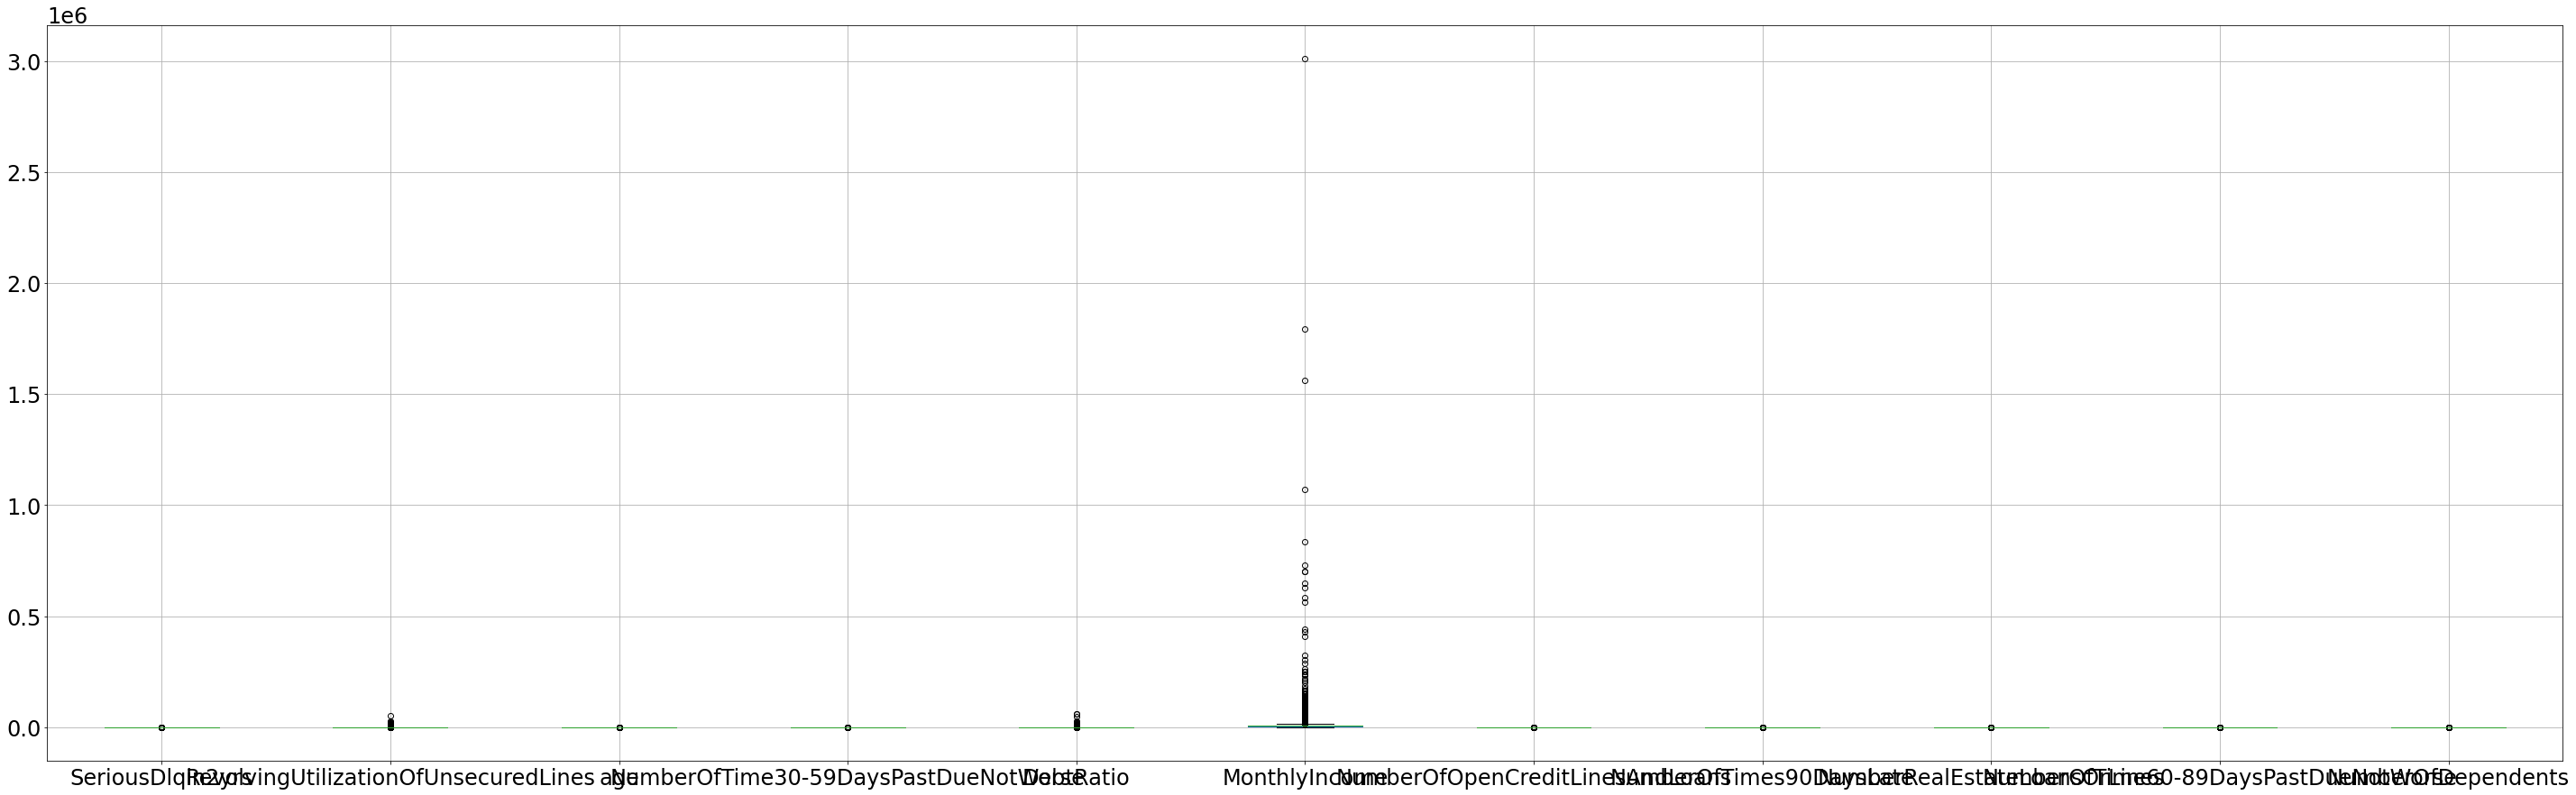

In [28]:
cleaned_raw_df.boxplot(figsize=(50,15))

/opt/conda/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'SeriousDlqin2yrs'}>,
        <AxesSubplot:title={'center':'RevolvingUtilizationOfUnsecuredLines'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'NumberOfTime30-59DaysPastDueNotWorse'}>,
        <AxesSubplot:title={'center':'DebtRatio'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>],
       [<AxesSubplot:title={'center':'NumberOfOpenCreditLinesAndLoans'}>,
        <AxesSubplot:title={'center':'NumberOfTimes90DaysLate'}>,
        <AxesSubplot:title={'center':'NumberRealEstateLoansOrLines'}>],
       [<AxesSubplot:title={'center':'NumberOfTime60-89DaysPastDueNotWorse'}>,
        <AxesSubplot:title={'center':'NumberOfDependents'}>,
        <AxesSubplot:>]], dtype=object)

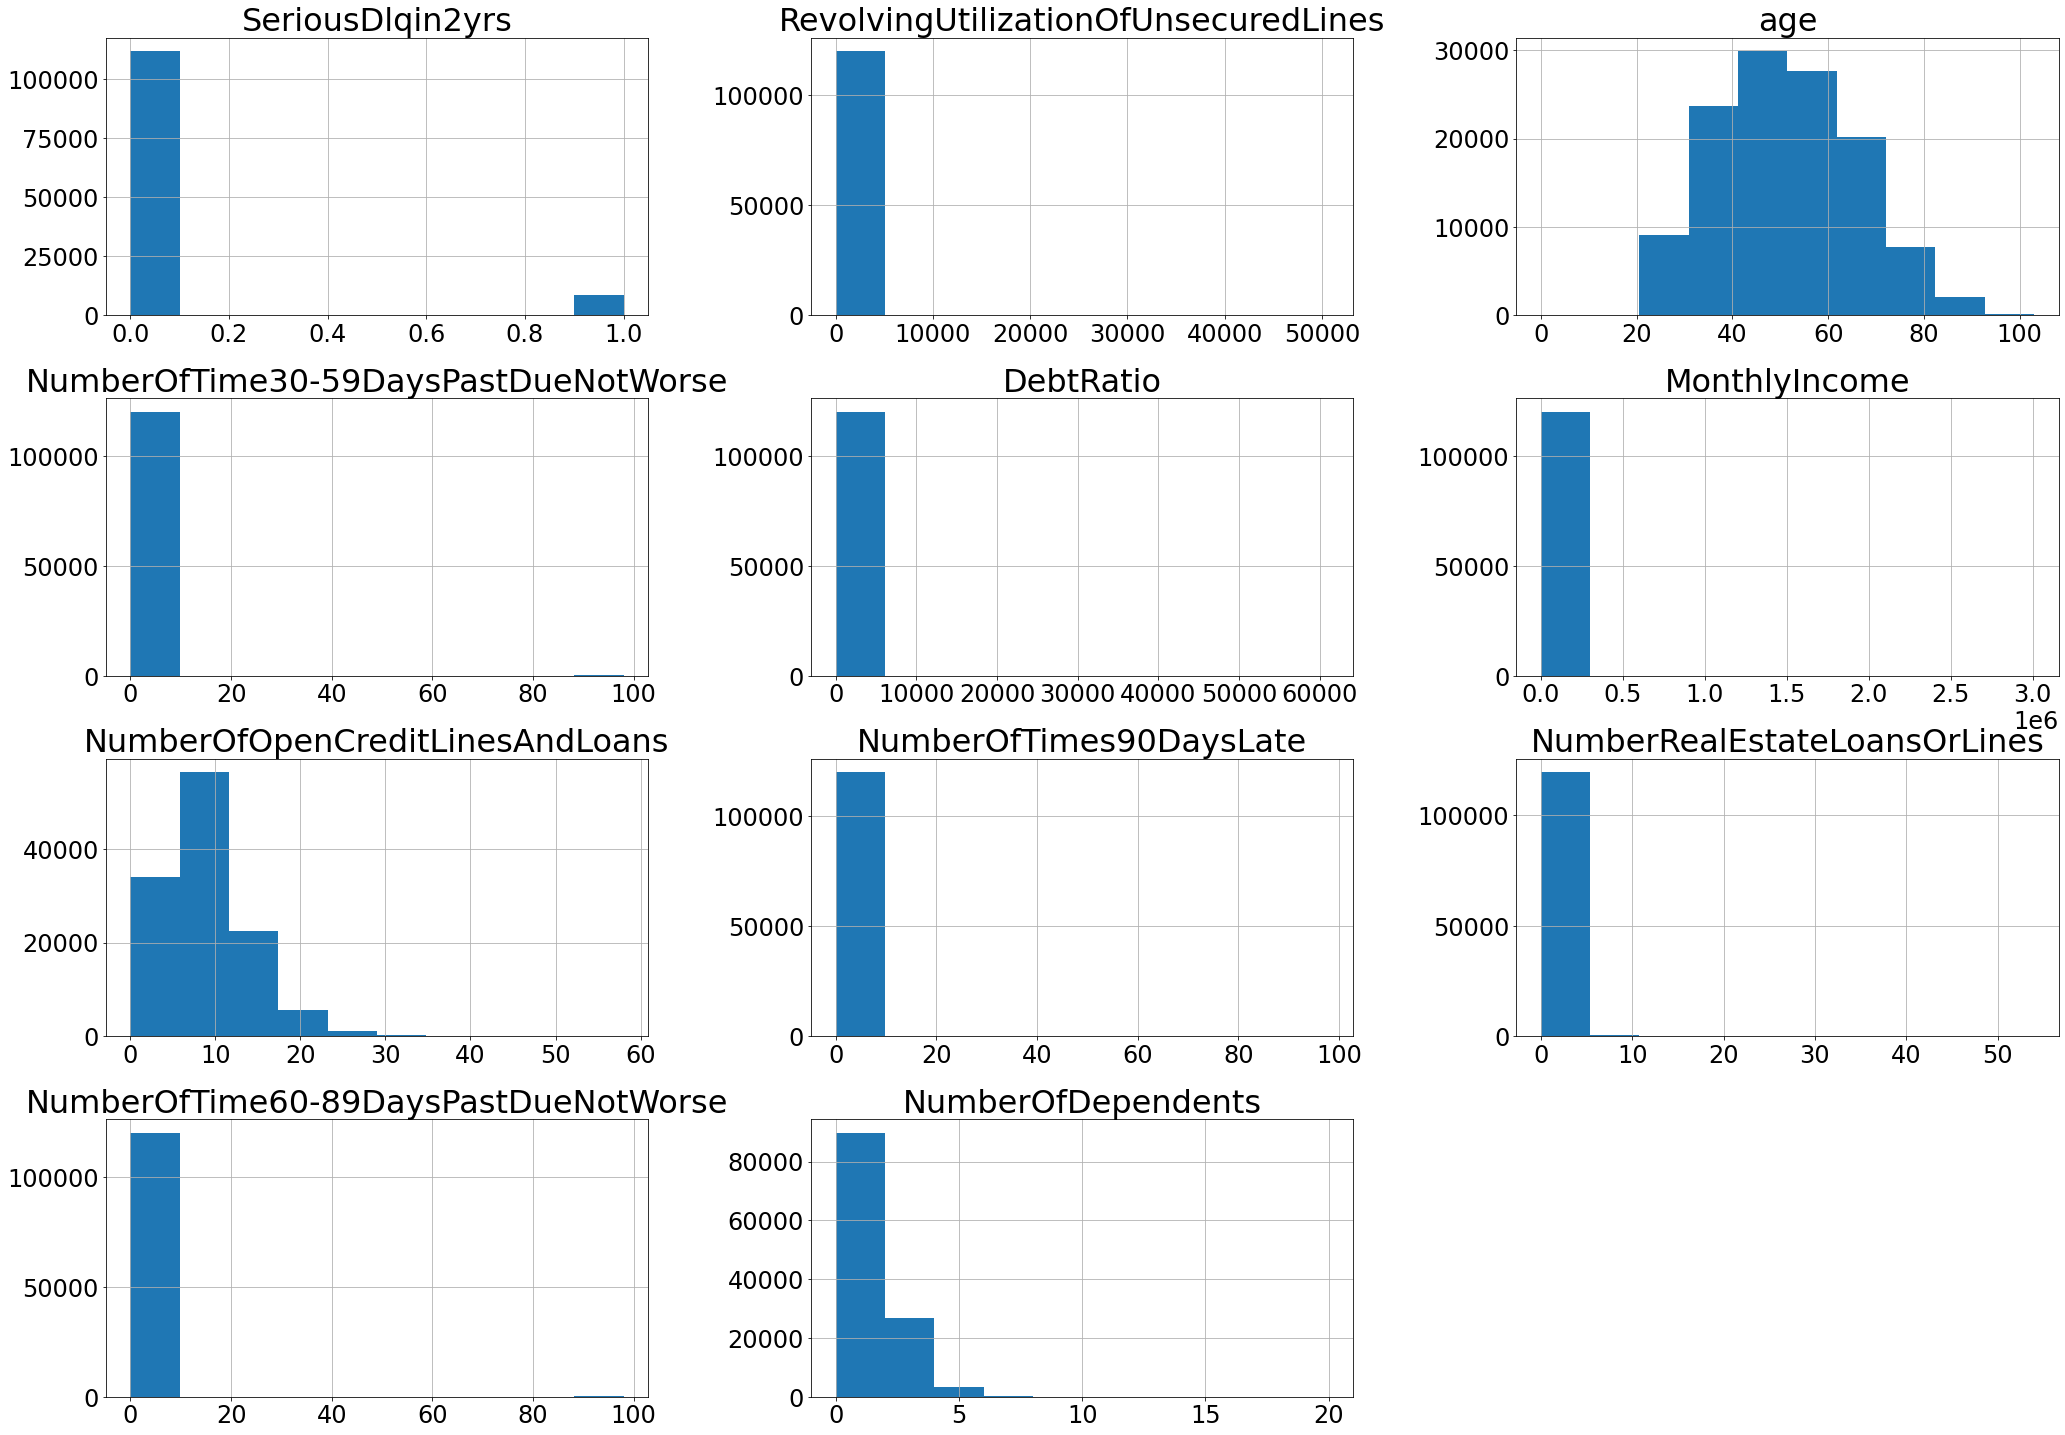

In [29]:
cleaned_raw_df.hist(figsize=(35,25))

In [30]:
for col in cleaned_raw_df.columns:
    print(f'{col}: {shapiro(cleaned_raw_df[col])}')

SeriousDlqin2yrs: ShapiroResult(statistic=0.2757086753845215, pvalue=0.0)
RevolvingUtilizationOfUnsecuredLines: ShapiroResult(statistic=0.006359457969665527, pvalue=0.0)
age: ShapiroResult(statistic=0.9897426962852478, pvalue=0.0)
NumberOfTime30-59DaysPastDueNotWorse: ShapiroResult(statistic=0.059172749519348145, pvalue=0.0)
DebtRatio: ShapiroResult(statistic=0.033414244651794434, pvalue=0.0)
MonthlyIncome: ShapiroResult(statistic=0.12984907627105713, pvalue=0.0)
NumberOfOpenCreditLinesAndLoans: ShapiroResult(statistic=0.9306896328926086, pvalue=0.0)
NumberOfTimes90DaysLate: ShapiroResult(statistic=0.030031800270080566, pvalue=0.0)
NumberRealEstateLoansOrLines: ShapiroResult(statistic=0.748004138469696, pvalue=0.0)
NumberOfTime60-89DaysPastDueNotWorse: ShapiroResult(statistic=0.0249289870262146, pvalue=0.0)
NumberOfDependents: ShapiroResult(statistic=0.749472975730896, pvalue=0.0)


/opt/conda/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [31]:
for col in cleaned_raw_df.columns:
    if shapiro(cleaned_raw_df[col])[1] > 0.05:
        print(f'{col}: {shapiro(cleaned_raw_df[col])}')
    else:
        print(f'{col} is not normal distribution')

SeriousDlqin2yrs is not normal distribution
RevolvingUtilizationOfUnsecuredLines is not normal distribution
age is not normal distribution
NumberOfTime30-59DaysPastDueNotWorse is not normal distribution
DebtRatio is not normal distribution
MonthlyIncome is not normal distribution
NumberOfOpenCreditLinesAndLoans is not normal distribution
NumberOfTimes90DaysLate is not normal distribution
NumberRealEstateLoansOrLines is not normal distribution
NumberOfTime60-89DaysPastDueNotWorse is not normal distribution
NumberOfDependents is not normal distribution


### Remove Outliers

In [32]:
# Computing IQR
Q1 = cleaned_raw_df['MonthlyIncome'].quantile(0.25)
Q3 = cleaned_raw_df['MonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1

cleaned_raw_df_rm_outliers = cleaned_raw_df[~((cleaned_raw_df['MonthlyIncome'] < (Q1 - 1.5 * IQR)) |(cleaned_raw_df['MonthlyIncome'] > (Q3 + 1.5 * IQR)))]

In [33]:
# Computing IQR
Q1 = cleaned_raw_df_rm_outliers['DebtRatio'].quantile(0.25)
Q3 = cleaned_raw_df_rm_outliers['DebtRatio'].quantile(0.75)
IQR = Q3 - Q1

cleaned_raw_df_rm_outliers = cleaned_raw_df_rm_outliers[~((cleaned_raw_df_rm_outliers['DebtRatio'] < (Q1 - 1.5 * IQR)) |(cleaned_raw_df_rm_outliers['DebtRatio'] > (Q3 + 1.5 * IQR)))]

In [34]:
# Computing IQR
Q1 = cleaned_raw_df_rm_outliers['RevolvingUtilizationOfUnsecuredLines'].quantile(0.25)
Q3 = cleaned_raw_df_rm_outliers['RevolvingUtilizationOfUnsecuredLines'].quantile(0.75)
IQR = Q3 - Q1

cleaned_raw_df_rm_outliers = cleaned_raw_df_rm_outliers[~((cleaned_raw_df_rm_outliers['RevolvingUtilizationOfUnsecuredLines'] < (Q1 - 1.5 * IQR)) |(cleaned_raw_df_rm_outliers['RevolvingUtilizationOfUnsecuredLines'] > (Q3 + 1.5 * IQR)))]

<AxesSubplot:>

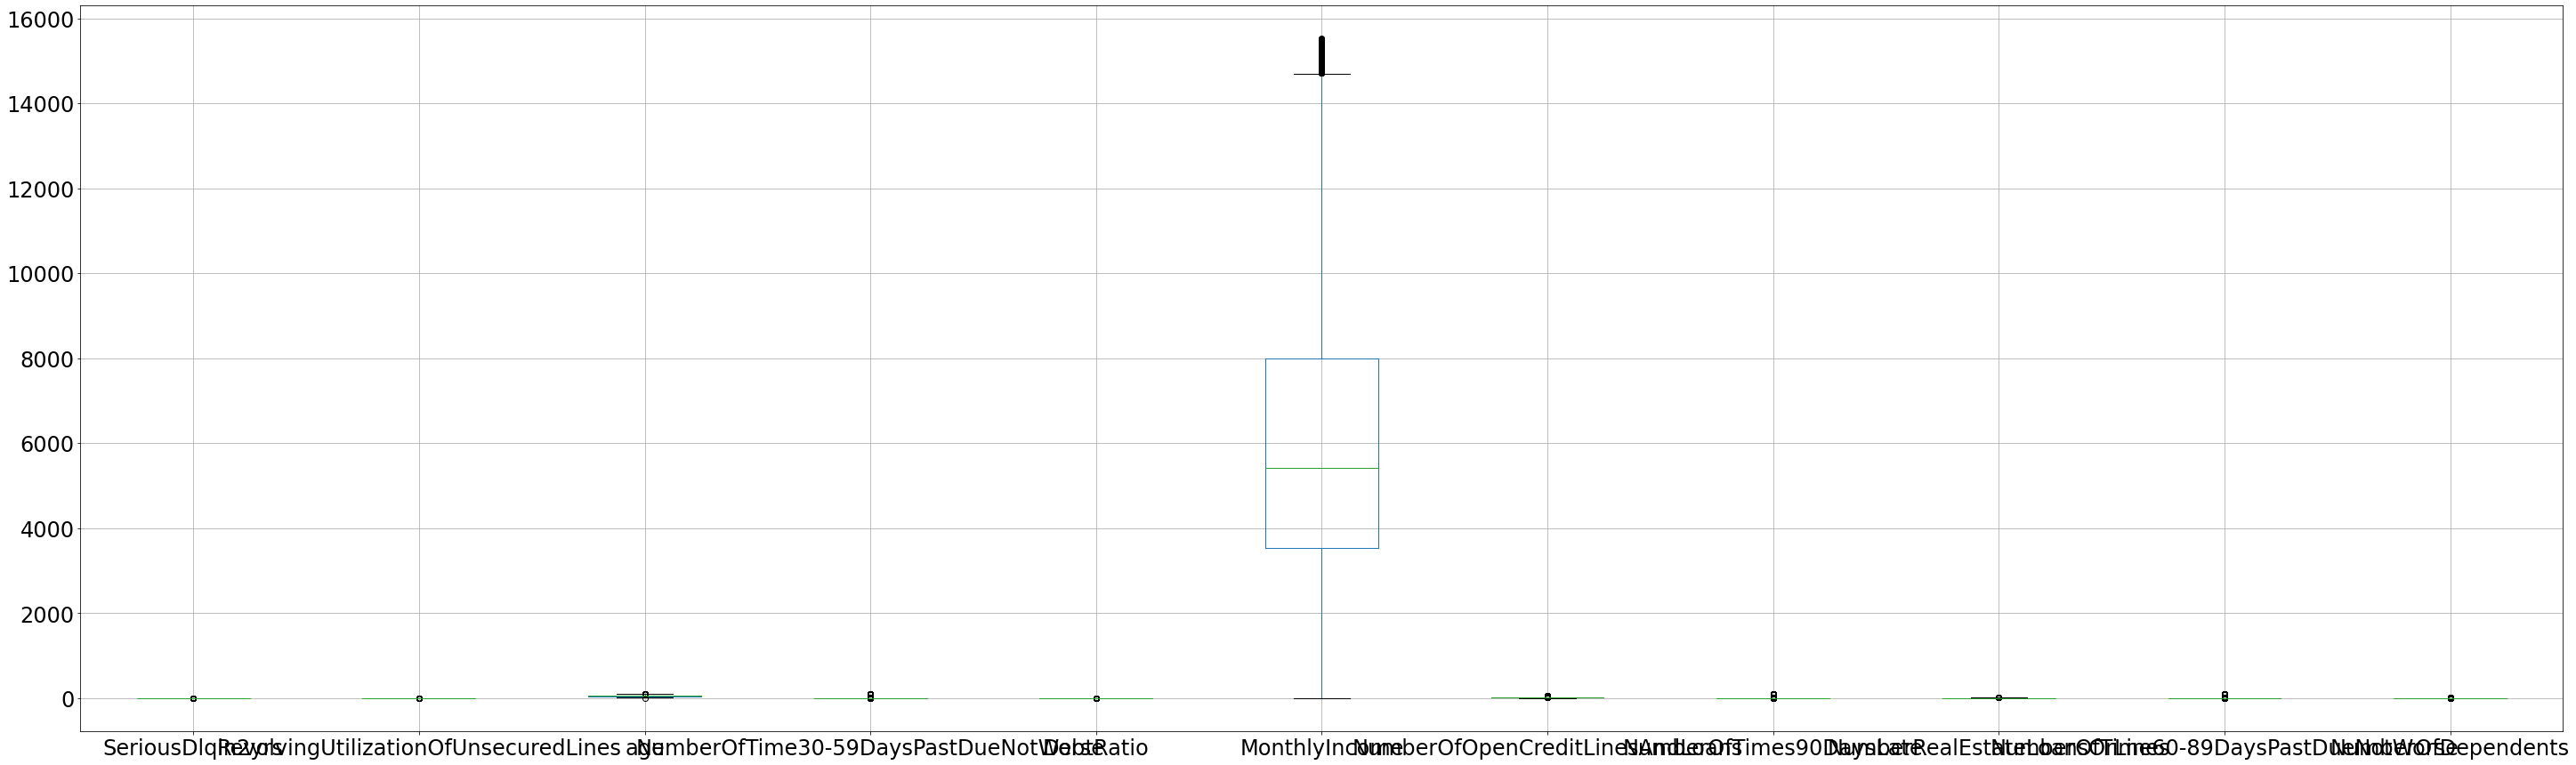

In [35]:
cleaned_raw_df_rm_outliers.boxplot(figsize=(50,15))

In [36]:
cleaned_raw_df_rm_outliers.shape

(107779, 11)

/opt/conda/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'SeriousDlqin2yrs'}>,
        <AxesSubplot:title={'center':'RevolvingUtilizationOfUnsecuredLines'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'NumberOfTime30-59DaysPastDueNotWorse'}>,
        <AxesSubplot:title={'center':'DebtRatio'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>],
       [<AxesSubplot:title={'center':'NumberOfOpenCreditLinesAndLoans'}>,
        <AxesSubplot:title={'center':'NumberOfTimes90DaysLate'}>,
        <AxesSubplot:title={'center':'NumberRealEstateLoansOrLines'}>],
       [<AxesSubplot:title={'center':'NumberOfTime60-89DaysPastDueNotWorse'}>,
        <AxesSubplot:title={'center':'NumberOfDependents'}>,
        <AxesSubplot:>]], dtype=object)

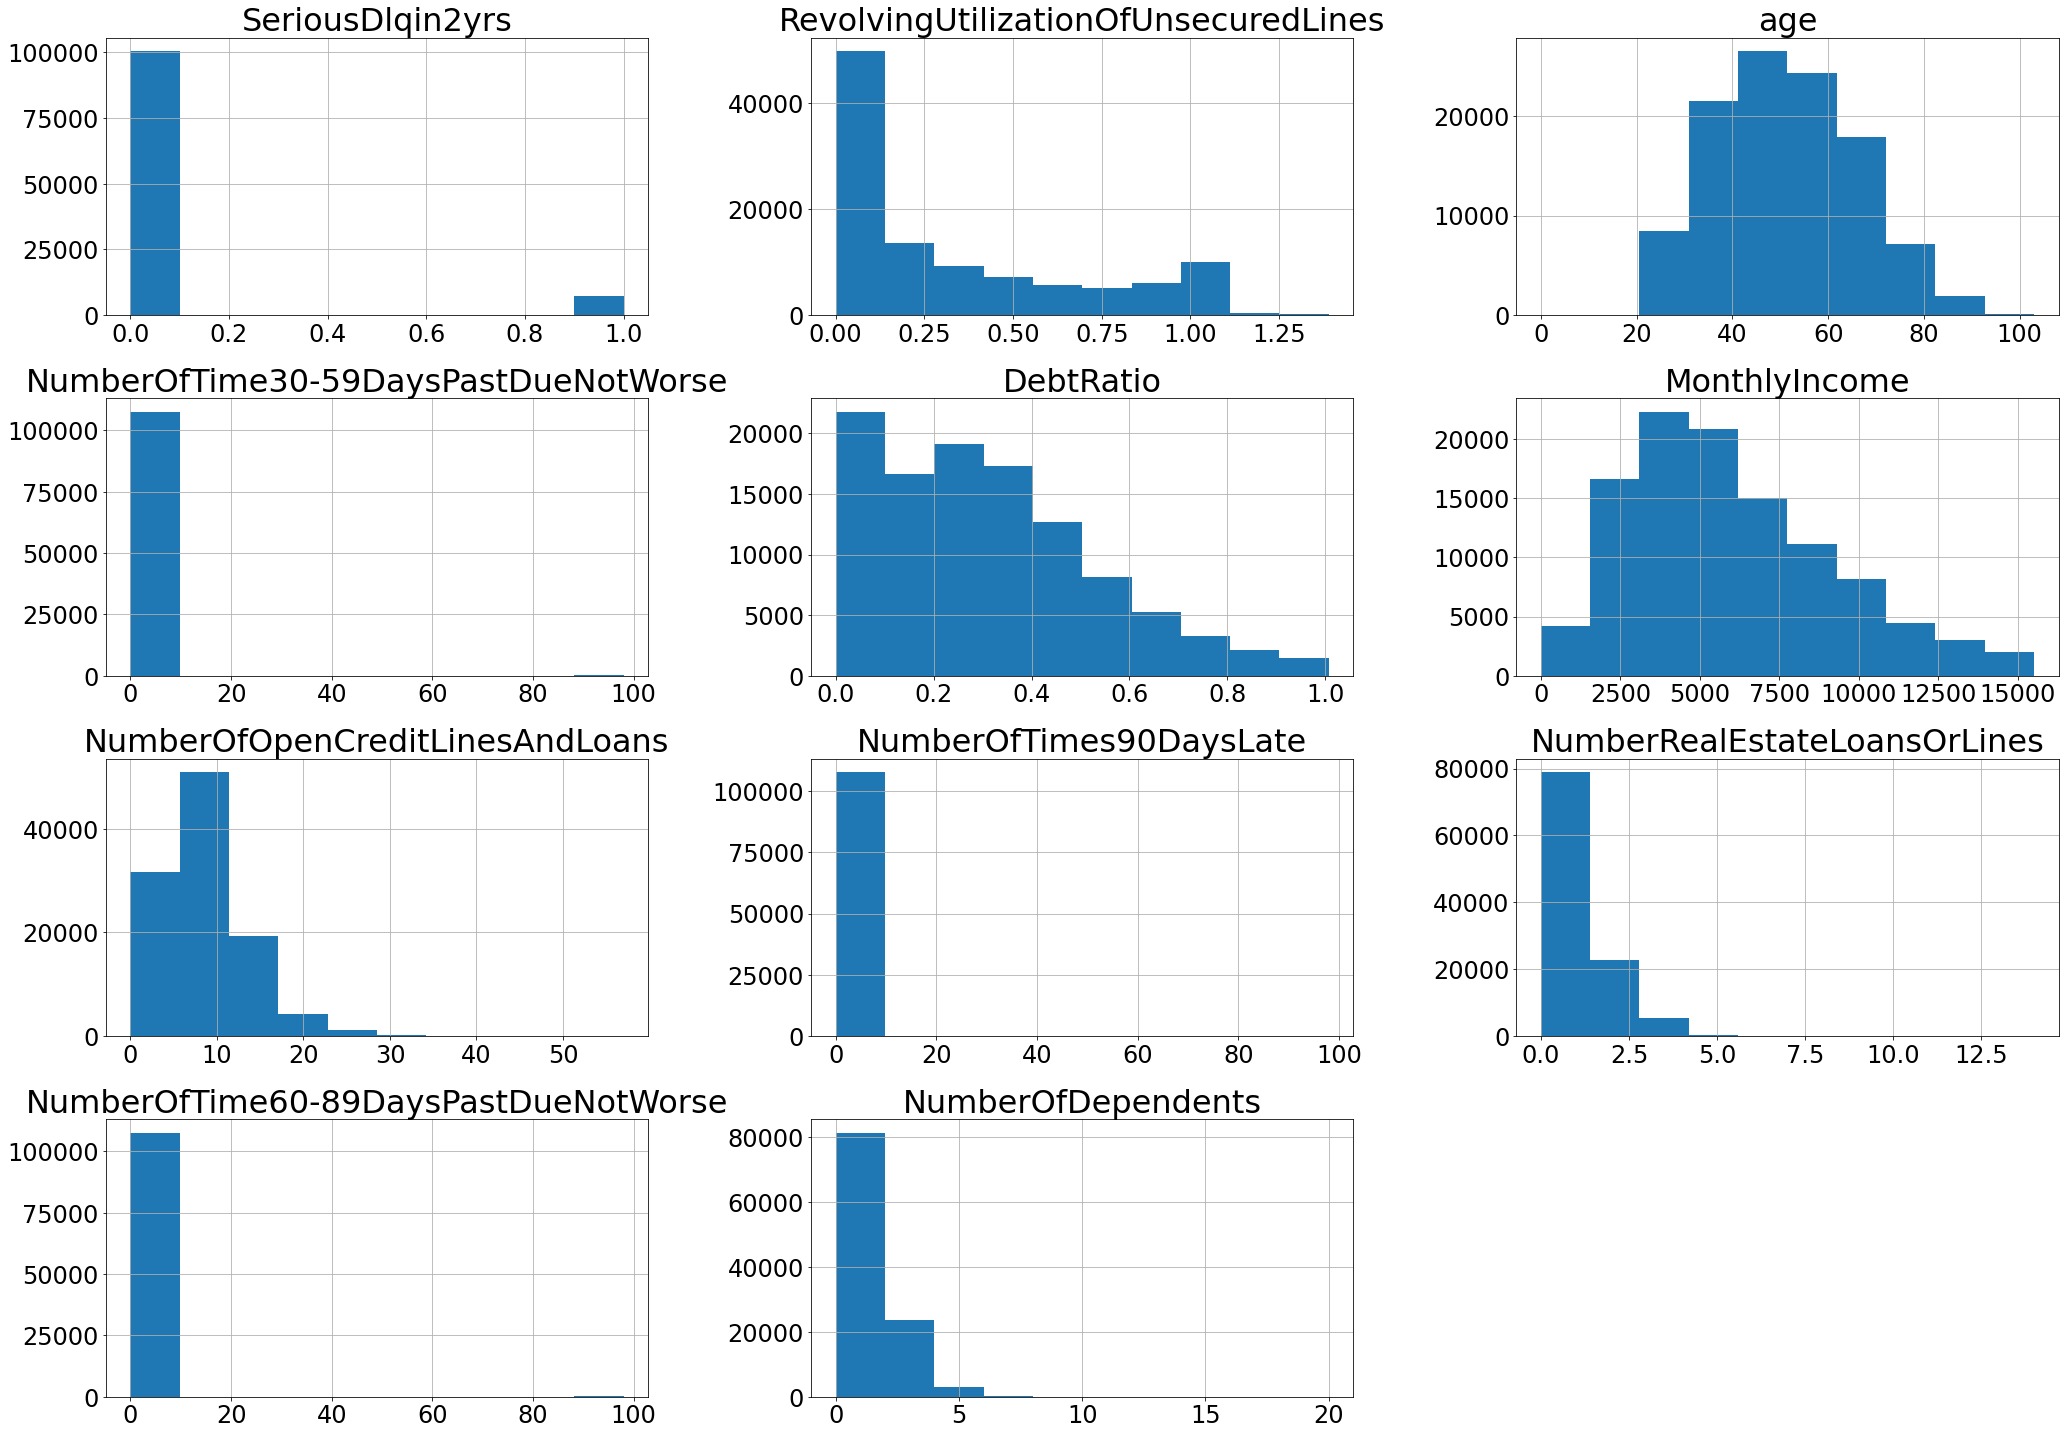

In [37]:
cleaned_raw_df_rm_outliers.hist(figsize=(35,25))

In [38]:
for col in cleaned_raw_df_rm_outliers.columns:
    if shapiro(cleaned_raw_df_rm_outliers[col])[1] > 0.05:
        print(f'{col}: {shapiro(cleaned_raw_df_rm_outliers[col])}')
    else:
        print(f'{col} is not normal distribution')

SeriousDlqin2yrs is not normal distribution
RevolvingUtilizationOfUnsecuredLines is not normal distribution
age is not normal distribution
NumberOfTime30-59DaysPastDueNotWorse is not normal distribution
DebtRatio is not normal distribution
MonthlyIncome is not normal distribution
NumberOfOpenCreditLinesAndLoans is not normal distribution
NumberOfTimes90DaysLate is not normal distribution
NumberRealEstateLoansOrLines is not normal distribution
NumberOfTime60-89DaysPastDueNotWorse is not normal distribution
NumberOfDependents is not normal distribution


/opt/conda/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [39]:
cleaned_raw_df_rm_outliers.corr()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,1.000000,0.274023,-0.105357,0.124398,0.055500,-0.067441,-0.039175,0.114317,-0.030561,0.097365,0.050344
RevolvingUtilizationOfUnsecuredLines,0.274023,1.000000,-0.275037,0.116394,0.149647,-0.119023,-0.182285,0.101874,-0.095599,0.088327,0.089976
age,-0.105357,-0.275037,1.000000,-0.050775,-0.071664,0.116821,0.185687,-0.048985,0.066470,-0.044880,-0.206746
NumberOfTime30-59DaysPastDueNotWorse,0.124398,0.116394,-0.050775,1.000000,-0.028875,-0.041525,-0.048527,0.978624,-0.030164,0.982630,0.002480
DebtRatio,0.055500,0.149647,-0.071664,-0.028875,1.000000,-0.044101,0.359734,-0.050532,0.554762,-0.045844,0.104537
MonthlyIncome,-0.067441,-0.119023,0.116821,-0.041525,-0.044101,1.000000,0.298680,-0.050360,0.411718,-0.045370,0.191835
NumberOfOpenCreditLinesAndLoans,-0.039175,-0.182285,0.185687,-0.048527,0.359734,0.298680,1.000000,-0.074961,0.408903,-0.064904,0.036042
NumberOfTimes90DaysLate,0.114317,0.101874,-0.048985,0.978624,-0.050532,-0.050360,-0.074961,1.000000,-0.044793,0.990893,-0.004452
NumberRealEstateLoansOrLines,-0.030561,-0.095599,0.066470,-0.030164,0.554762,0.411718,0.408903,-0.044793,1.000000,-0.038416,0.129838
NumberOfTime60-89DaysPastDueNotWorse,0.097365,0.088327,-0.044880,0.982630,-0.045844,-0.045370,-0.064904,0.990893,-0.038416,1.000000,-0.005941


In [40]:
cleaned_raw_df_rm_outliers.corr()['SeriousDlqin2yrs']

SeriousDlqin2yrs                        1.000000
RevolvingUtilizationOfUnsecuredLines    0.274023
age                                    -0.105357
NumberOfTime30-59DaysPastDueNotWorse    0.124398
DebtRatio                               0.055500
MonthlyIncome                          -0.067441
NumberOfOpenCreditLinesAndLoans        -0.039175
NumberOfTimes90DaysLate                 0.114317
NumberRealEstateLoansOrLines           -0.030561
NumberOfTime60-89DaysPastDueNotWorse    0.097365
NumberOfDependents                      0.050344
Name: SeriousDlqin2yrs, dtype: float64

### Data Min Max Scaling

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(cleaned_raw_df_rm_outliers)
print(scaled[0])

[1.         0.55104992 0.4368932  0.02040816 0.7974031  0.58762887
 0.22807018 0.         0.42857143 0.         0.1       ]


In [43]:
scaled_cleaned_raw_df_rm_outliers = pd.DataFrame(scaled, columns=cleaned_raw_df_rm_outliers.columns) 

In [44]:
scaled_cleaned_raw_df_rm_outliers.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1.0,0.551050,0.436893,0.020408,0.797403,0.587629,0.228070,0.000000,0.428571,0.0,0.10
1,0.0,0.688448,0.388350,0.000000,0.121029,0.167526,0.070175,0.000000,0.000000,0.0,0.05
2,0.0,0.473408,0.368932,0.010204,0.084522,0.196005,0.035088,0.010204,0.000000,0.0,0.00
3,0.0,0.168172,0.291262,0.000000,0.035799,0.212629,0.087719,0.000000,0.000000,0.0,0.00
4,0.0,0.153332,0.718447,0.000000,0.372997,0.225515,0.052632,0.000000,0.071429,0.0,0.05


## Export data

In [45]:
output_file_name = f"Remove-Outliers-MinMaxScaled-{VERSION}.csv"
scaled_cleaned_raw_df_rm_outliers.to_csv(f'{INTERIM_DATA_DIR}/{output_file_name}', index=False)

In [46]:
output_file_name = f"Remove-Outliers-{VERSION}.csv"
cleaned_raw_df_rm_outliers.to_csv(f'{INTERIM_DATA_DIR}/{output_file_name}', index=False)

## Load Raw Testing Data

In [92]:
raw_testing_df = pd.read_csv(f'{RAW_DATA_DIR}/cs-test.csv')